# The purpose of this project is to explore the most selling car? 

## Columns and their meaning: 
> - Name: Car company and the name of the model.  
> - year: The year in which the car was sold. 
> - Selling price: The price of the car. 
> - km driven : how much did the car move in km.
> - Transmission: either manual or automatic. 
> - Owner: whither or not the car was used. 

## Questions: 
> - What's the common brand? (Dania)
> - what's the Average prices of the brands? (Ziyad)
> - what's the best selling year? (Faisal)
> - What are the top 10 best selling cars? (Faisal)
> - What's the average selling price for cars per year? (Faisal) 
> - What's the distribution of manual vs automatic? (Alaa)
> - For each year which company sold the most? (Alaa)
> - What is the distribution of ownership types among individual car sellers (Ziyad)
> - What factors affect the price of the car? (Dania) 

In [ ]:
#Import libraries
import numpy as np #to deal with data
import pandas as pd #to deal with data
import matplotlib.pyplot as plt#to deal with graphic charts
import matplotlib.ticker as ticker#to deal with graphic charts
import seaborn as sns #to deal with graphic charts

In [ ]:
# Import dataset
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


## Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
#Data description
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
print(df[df['selling_price'] >= 3000000].shape)

(49, 8)


In [ ]:
#Data shape  
df.shape

(4340, 8)

In [ ]:
# Check for null values 
df.isnull().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
dtype: bool

In [ ]:
#disply categorical values
def values(sell, fuel, tran, ownd):
    sell = df['seller_type'].unique()
    fuel = df['fuel'].unique()
    tran = df['transmission'].unique()
    ownd= df['owner'].unique()
    return (sell, fuel, tran, ownd)

values('seller_type', 'fuel', 'transmission', 'owner')



(array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object),
 array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object),
 array(['Manual', 'Automatic'], dtype=object),
 array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
        'Third Owner', 'Test Drive Car'], dtype=object))

## What the common brand?

In [ ]:
# Extract brand from name
df["Brand"] = df.name.apply(lambda x : ''.join(x.split(' ')[:1]))
df['Brand'].head()


0     Maruti
1     Maruti
2    Hyundai
3     Datsun
4      Honda
Name: Brand, dtype: object

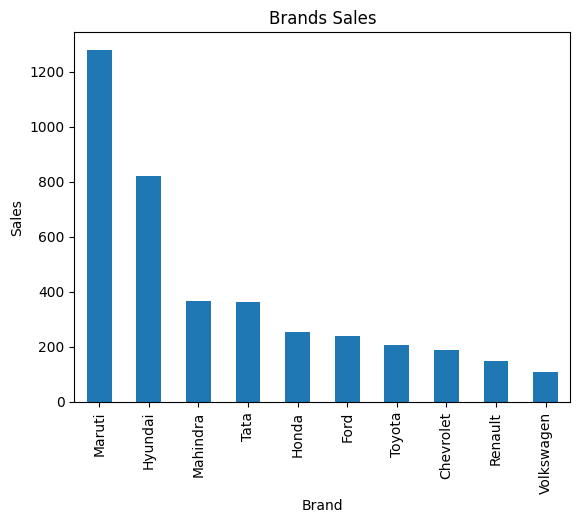

In [ ]:
# Plot the value counts of the 'brand' column
df.Brand.value_counts(normalize=False).head(10).plot(kind="bar")
plt.xlabel("Brand")
plt.ylabel("Sales")
plt.title("Brands Sales")
plt.show()

In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'Brand'],
      dtype='object')

## What's The Average Prices of The Brands?

In [ ]:
# Used to find the average selling price of each brand
average_prices = df.groupby('Brand')['selling_price'].mean().reset_index()

In [ ]:
# Convert INR to SAR
conversion_rate = 0.045
average_prices['selling_price_sar'] = average_prices['selling_price'] * conversion_rate

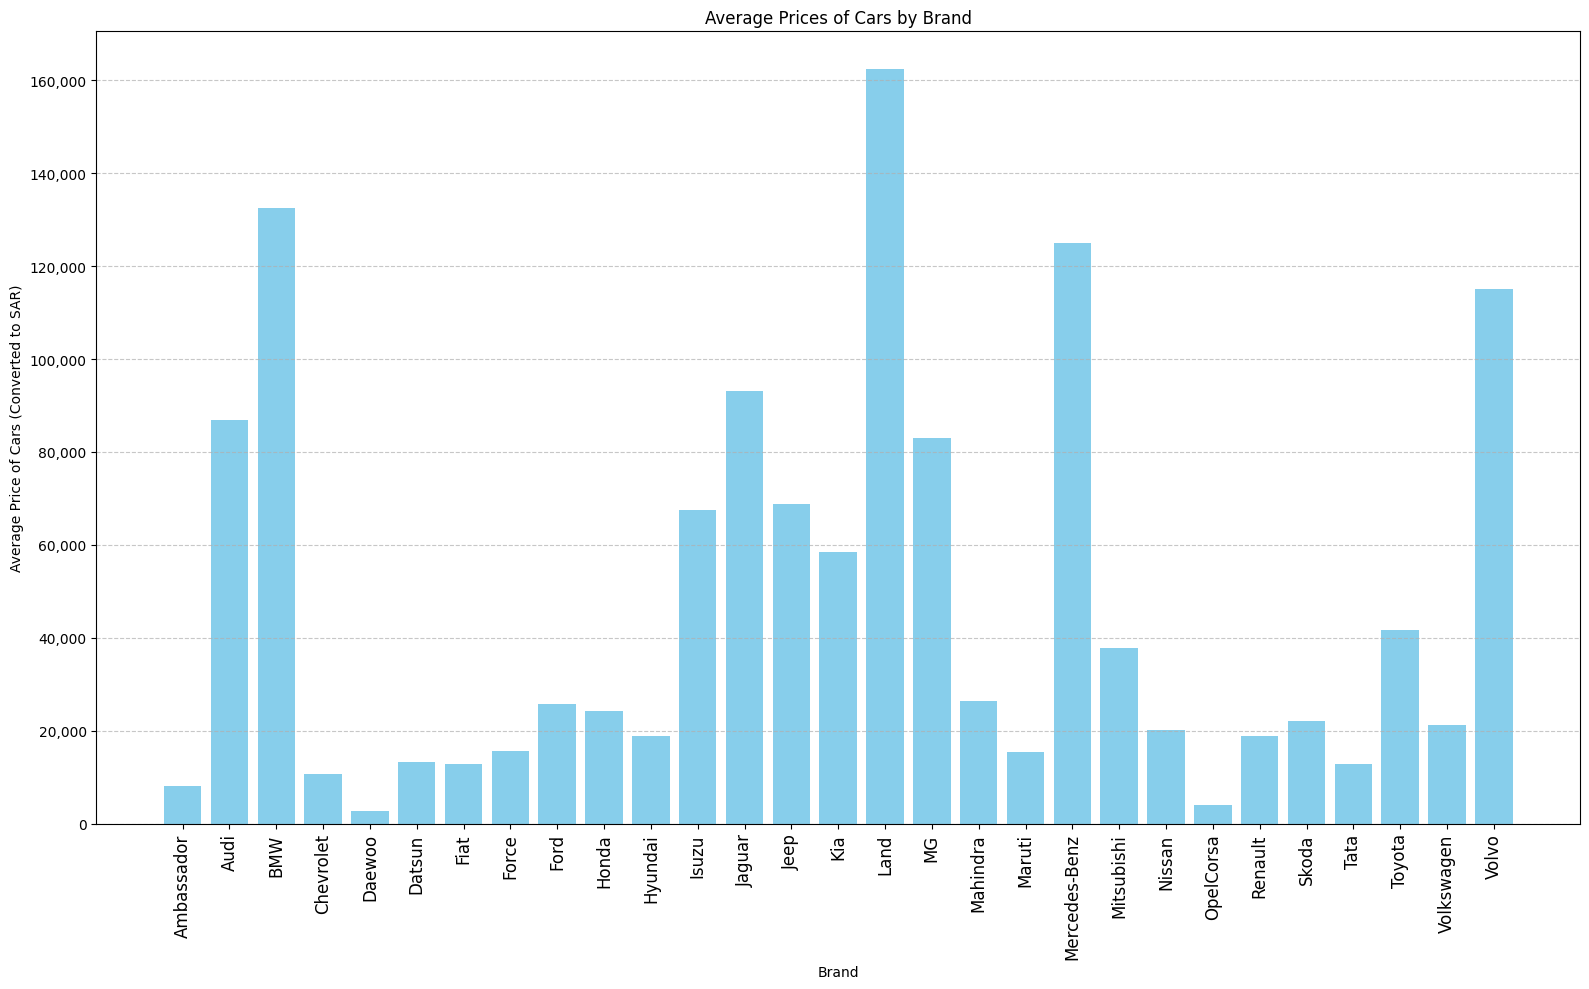

In [ ]:
plt.figure(figsize=(16, 10))
plt.bar(average_prices['Brand'], average_prices['selling_price_sar'], color='skyblue')
plt.xlabel('Brand')
plt.ylabel('Average Price of Cars (Converted to SAR)')
plt.title('Average Prices of Cars by Brand')
plt.xticks(rotation=90, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout() 
plt.show()

## what's the best selling year? 


In [ ]:
#Group the data by year and calculate the mode of the name column
year_name_counts = df.groupby(['year', 'name']).size().reset_index(name='count')

most_common_per_year = year_name_counts.loc[year_name_counts.groupby(['year'])['count'].idxmax()]


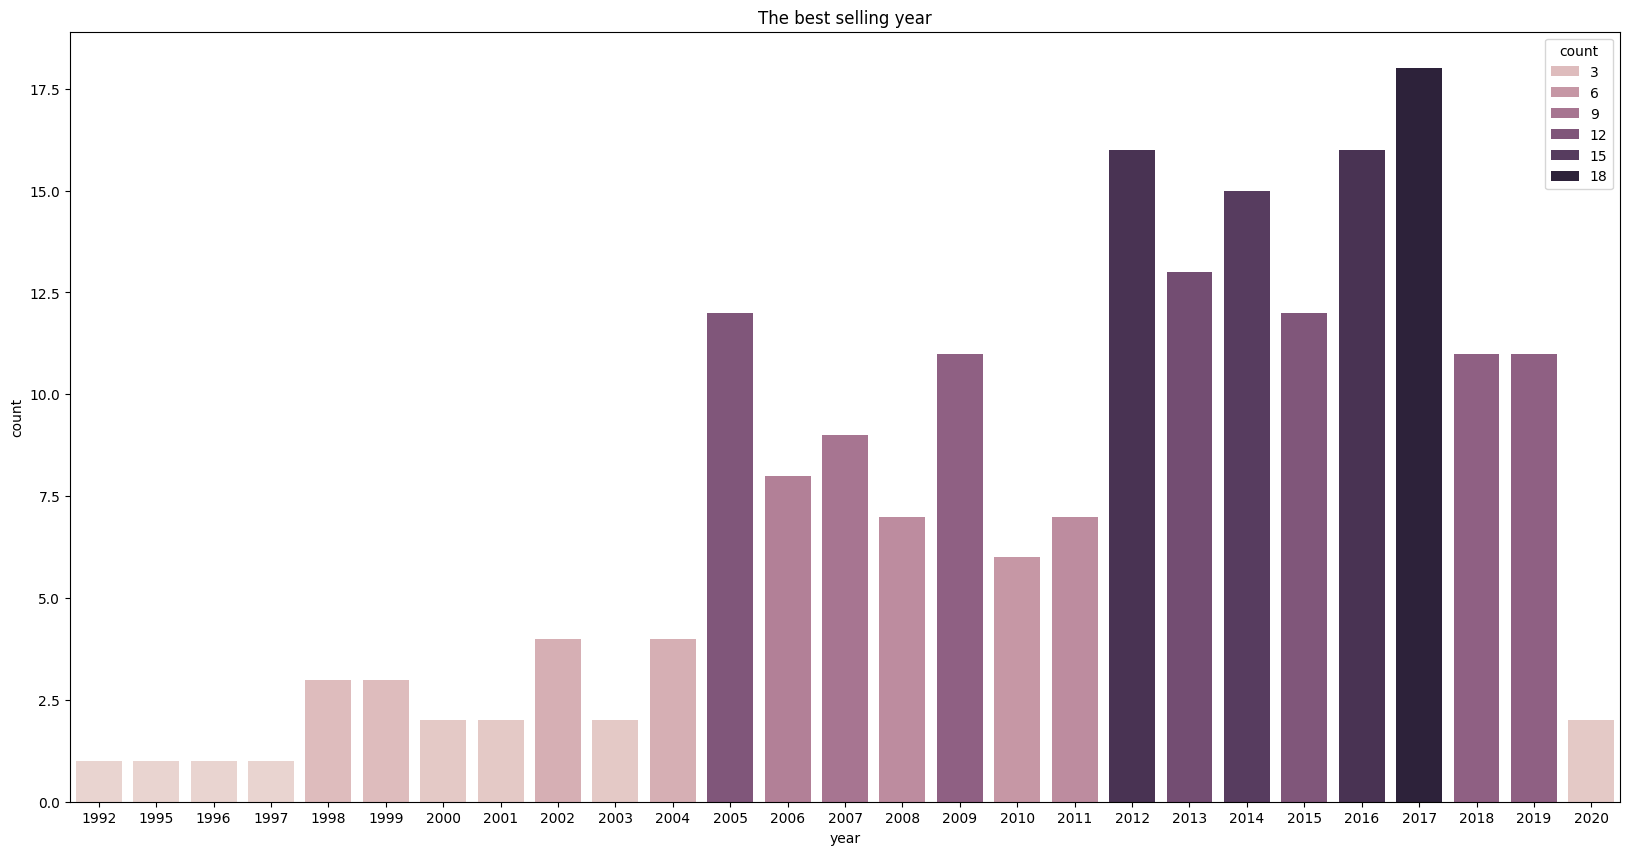

In [ ]:
sorted_years = most_common_per_year['year'].sort_values().unique()
plt.figure(figsize = (20, 10))
sns.barplot(x = 'year', y = 'count', order= sorted_years, data = most_common_per_year, hue = 'count', dodge = False)
plt.title('The best selling year')
plt.xlabel('year')
plt.ylabel('count')
plt.show()

## What are the top 10 best selling cars?


In [ ]:
# What are the top 10 best selling cars?
best_selling_car_data = df['name'].value_counts().reset_index()
best_selling_car_data.columns = ['Car Name', 'Count']
best_selling_car_data.sort_values(by='Count', inplace=True, ascending=False)
best_selling_car_data = best_selling_car_data.head(10)

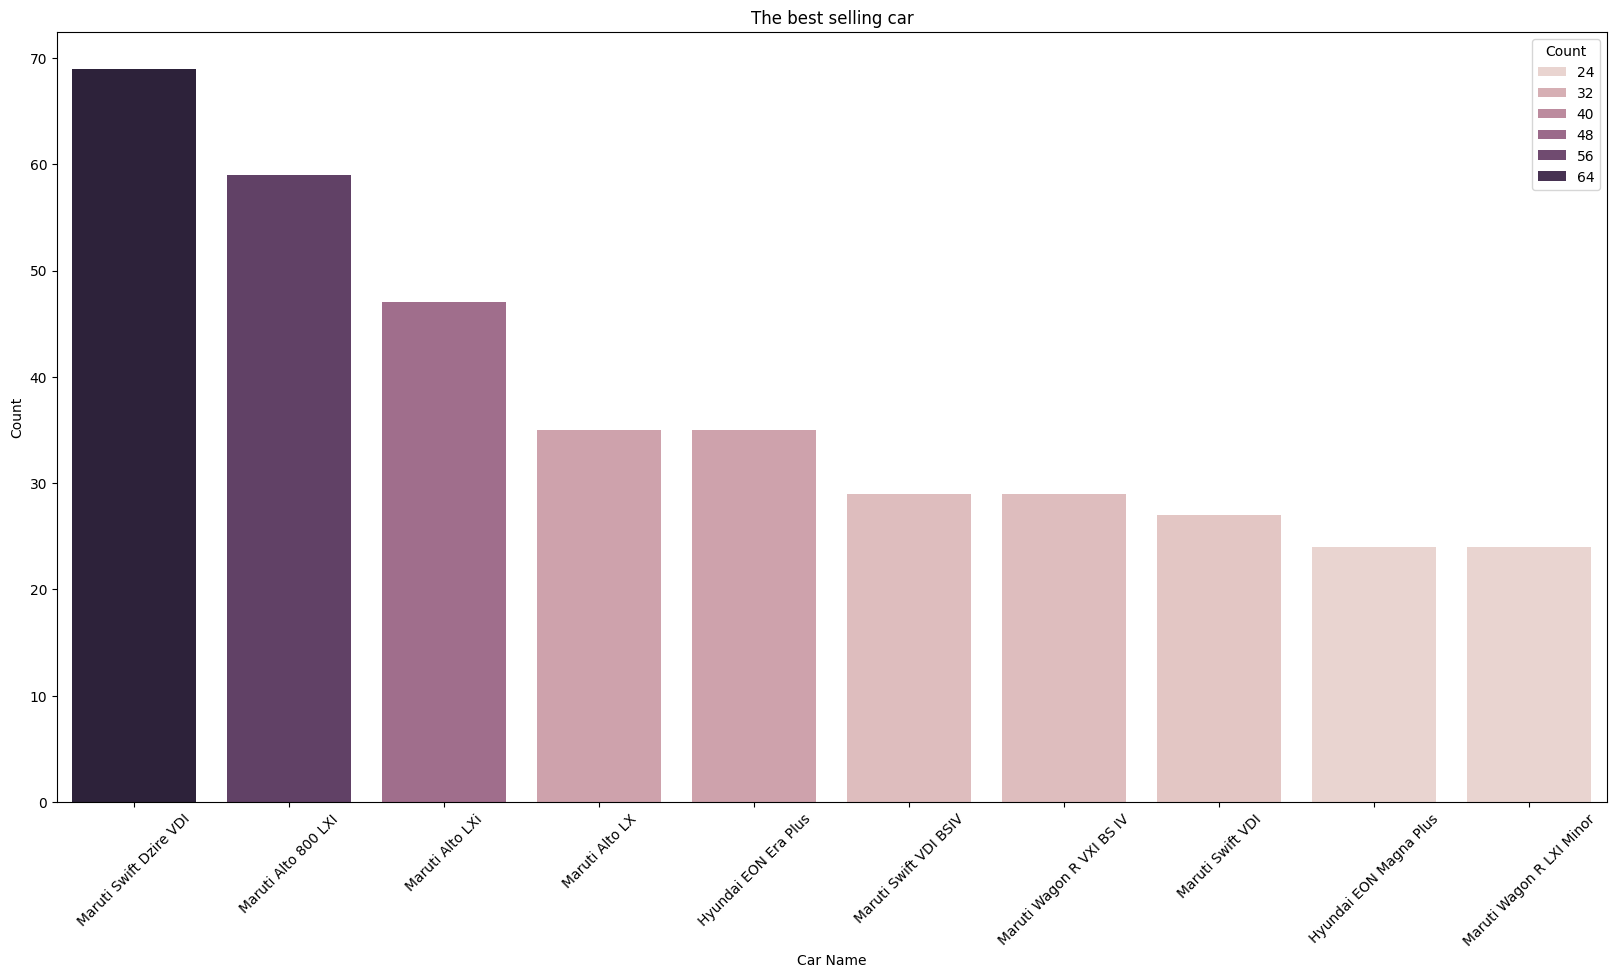

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x = 'Car Name', y = 'Count', data = best_selling_car_data, hue = 'Count', dodge = False)
plt.title('The best selling car')
plt.xlabel('Car Name')
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.show()

## What's the average selling price for cars per year? 


In [ ]:
average_selling_price_per_year = df.groupby('year')['selling_price'].mean().reset_index()

conversion_rate = 0.045
average_selling_price_per_year['selling_price'] = (average_selling_price_per_year['selling_price'] * conversion_rate).astype(int)

average_selling_price_per_year.columns = ['year', 'selling_price']
average_selling_price_per_year.head(27)

,year,selling_price
0,1992,2250
1,1995,4275
2,1996,10125
3,1997,4185
4,1998,9630
5,1999,3307
6,2000,3667
7,2001,5294
8,2002,4082
9,2003,3895


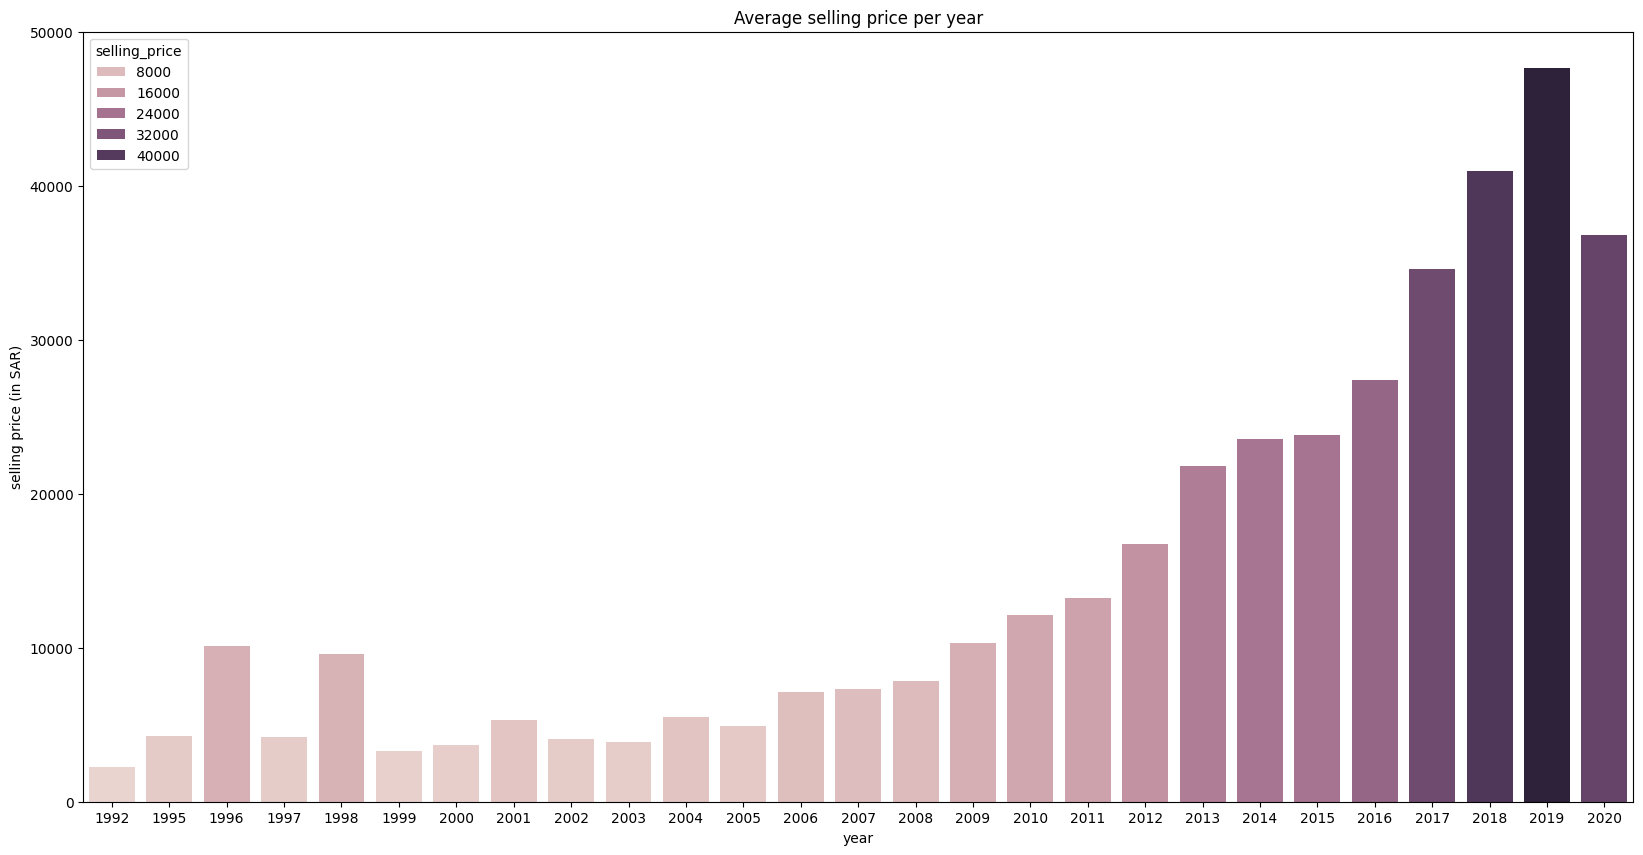

In [ ]:
plt.figure(figsize = (20, 10))
sns.barplot(x = 'year', y = 'selling_price', data = average_selling_price_per_year, hue = 'selling_price', dodge = False)
plt.title('Average selling price per year')
plt.xlabel('year')
plt.ylabel('selling price (in SAR)')
plt.show()

# What's the distribution of manual vs automatic?

In [ ]:
df['is_manual_transmission'] = df['transmission'].apply(lambda x: True if x == 'Manual' else False)

manual_count = df['is_manual_transmission'].sum()
automatic_count = len(df) - manual_count

print(f"Manual transmission count: {manual_count}")
print(f"Automatic transmission count: {automatic_count}")

Manual transmission count: 3892
Automatic transmission count: 448


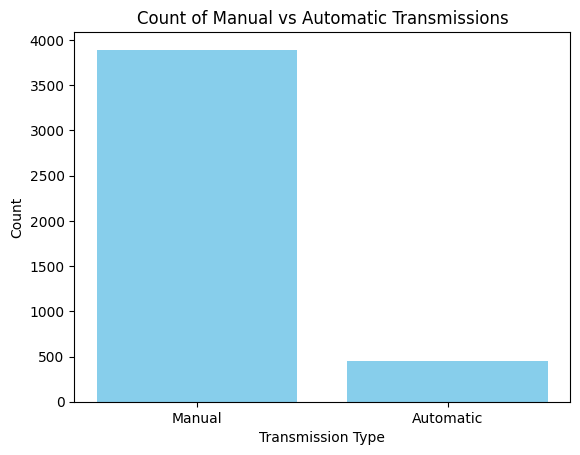

In [ ]:
counts = [manual_count, automatic_count]
transmission_types = ['Manual', 'Automatic']
plt.bar(transmission_types, counts, color=['skyblue'])
plt.title('Count of Manual vs Automatic Transmissions')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()

# For each year which company sold the most?

In [ ]:
results = []

for year in df['year'].unique():
    year_data = df[df['year'] == year]
    sales_count = year_data['Brand'].value_counts()
    
    for brand, count in sales_count.items():
        results.append([year, brand, count])

result_df = pd.DataFrame(results, columns=['year', 'company', 'sales_count'])
result_df['year'] = pd.to_numeric(result_df['year'], errors='coerce')  
result_df = result_df.sort_values('year')  

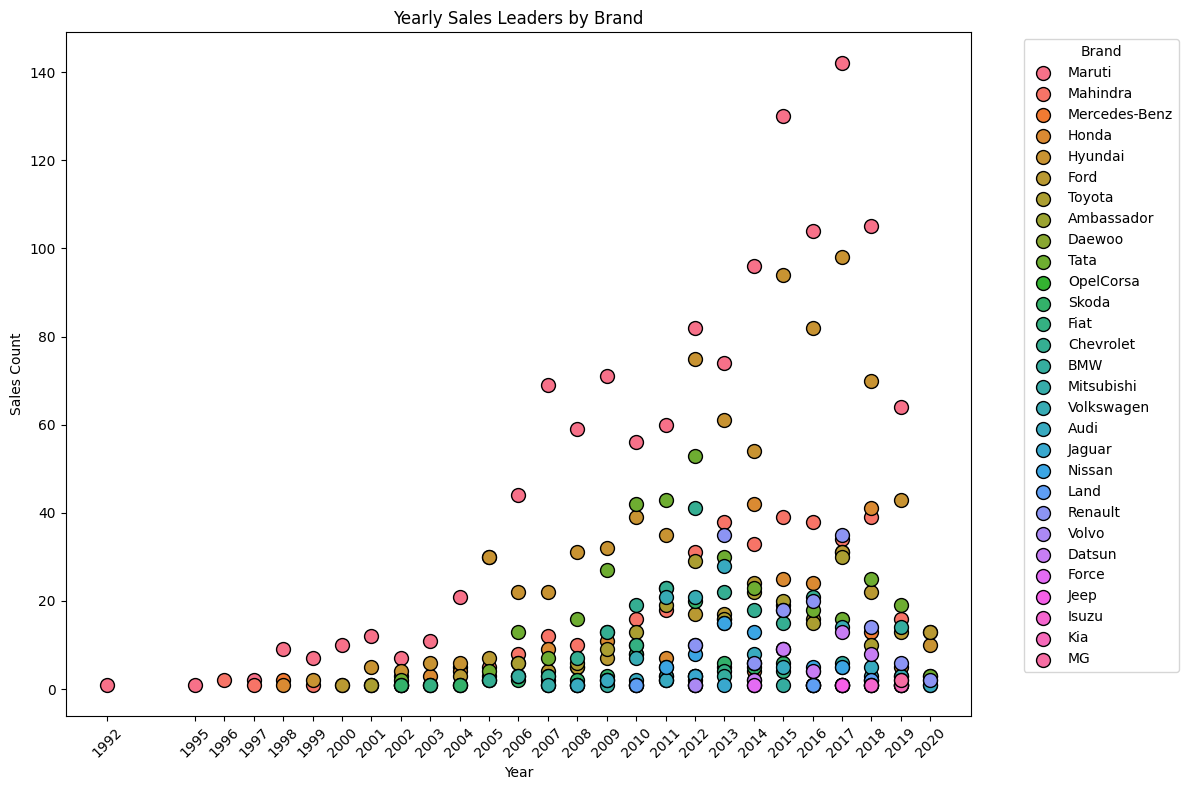

In [ ]:
unique_brands = result_df['company'].unique()
palette = sns.color_palette("husl", len(unique_brands))  
color_dict = {brand: palette[i] for i, brand in enumerate(unique_brands)}


plt.figure(figsize=(12, 8))

for brand in unique_brands:
    brand_data = result_df[result_df['company'] == brand]
    plt.scatter(brand_data['year'], brand_data['sales_count'], label=brand, color=color_dict[brand], s=100, edgecolor='k')

plt.xticks(ticks=result_df['year'].unique(), rotation=45)

plt.xlabel('Year')
plt.ylabel('Sales Count')
plt.title('Yearly Sales Leaders by Brand')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout() 
plt.show()


## What is the distribution of ownership types among individual car sellers?

In [ ]:
# Used to filter the DataFrame for individual first owners and second owners
first_owners_count = df[(df['seller_type'] == 'Individual') & (df['owner'] == 'First Owner')].shape[0]
second_owners_count = df[(df['seller_type'] == 'Individual') & (df['owner'] == 'Second Owner')].shape[0]


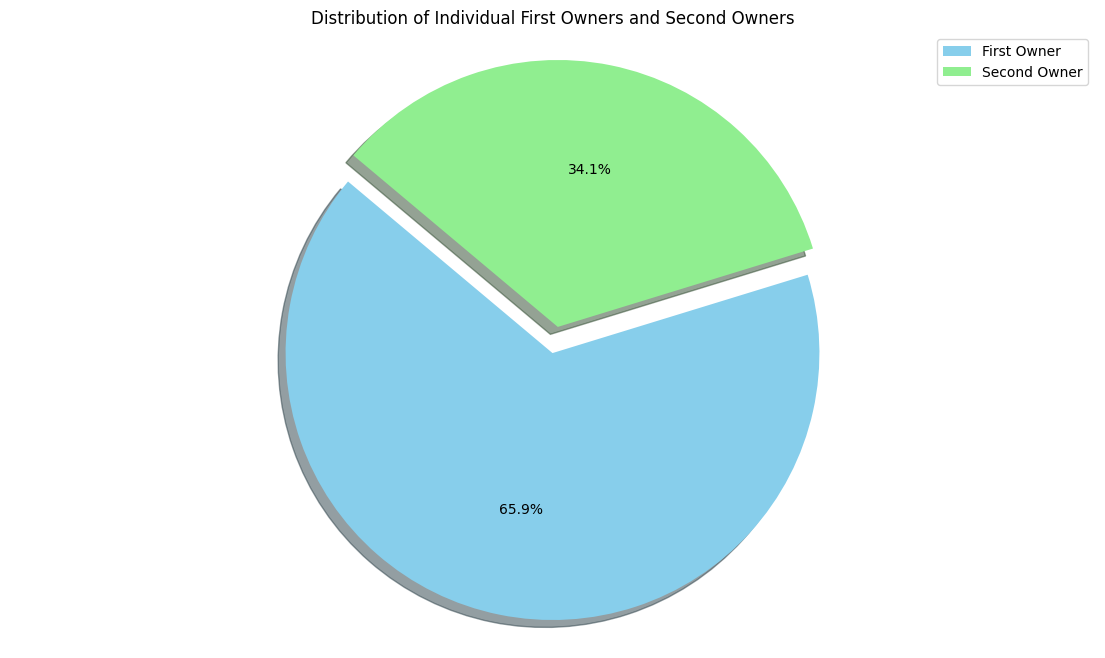

In [ ]:
labels = ['First Owner', 'Second Owner']
sizes = [first_owners_count, second_owners_count]
colors = ['skyblue', 'lightgreen']
explode = (0.1, 0)  # explode the 1st slice

plt.figure(figsize=(14, 8))
plt.pie(sizes, explode=explode, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Distribution of Individual First Owners and Second Owners')
plt.axis('equal')
plt.legend(labels, loc="best")

plt.show()

# لا تسووا رن للاكواد للي تحت 

## What factors affect the price of the car?

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

#convert categorical to numeric
le = preprocessing.LabelEncoder()
df['name_num']= le.fit_transform(df['name'])
df['brand_num']= le.fit_transform(df['Brand'])
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Brand,is_manual_transmission,name_num,brand_num
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,True,775,18
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,True,1041,18
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,True,505,10
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,True,118,5
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,True,279,9


In [ ]:
# One hot encoding
enc = OneHotEncoder(sparse = False)
col = df[["fuel", "seller_type", "transmission", 'owner']]
tran = enc.fit_transform(col)
new_col = enc.get_feature_names_out(["fuel","seller_type","transmission", 'owner'])
df[new_col] = tran
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Brand,is_manual_transmission,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,True,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,True,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,True,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,True,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,True,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


<AxesSubplot: >

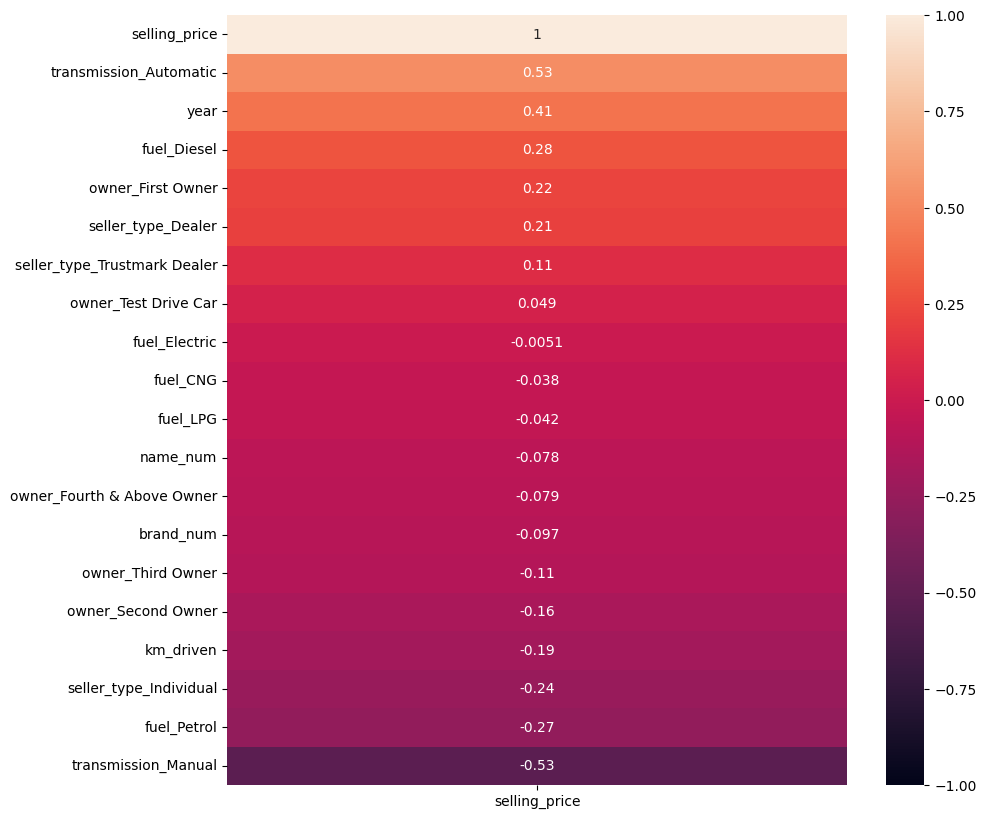

In [ ]:
# Correlation heatmap
numeric = df.select_dtypes(include=['number'])
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(numeric.corr()[["selling_price"]].sort_values("selling_price", ascending = False),
vmin = -1, vmax = +1, annot = True, ax = ax)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5412706e-5eb2-4d46-abe1-db8a08ff4439' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>